# <center>ECON 725: Computer Programming and Data Management in Economics <a class="tocSkip"></center>    
# <center> Classification: Heart Disease Prediction <a class="tocSkip"></center>

## Learning Objectives
<hr>

- Explore the heart disease dataset using exploratory data analysis
- Exercise with classification algorithms for prediction (modelling)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')
print('Shape of the data is ', data.shape)

Shape of the data is  (303, 14)


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Data Dictionary
* age: age in years
* sex: sex
    * 1 = male
    * 0 = female
* cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl)
    * 1 = true;
    * 0 = false
* restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina
    * 1 = yes
    * 0 = no
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal:
    * 0 = error (in the original dataset 0 maps to NaN's)
    * 1 = fixed defect
    * 2 = normal
    * 3 = reversable defect
* target (the label):
    * 0 = no disease,
    * 1 = disease

### Data pre-processing

#### Drop faulty data

Suppose you find incorrect information during an expert discussion that needs to be removed

* data #93, 159, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs.
* data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.

In [5]:
data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(data)} instead of 303!')

The length of the data now is 296 instead of 303!


#### Rename columns for the sake of clarity
* The feature names in the dataset are abbreviated and hard to understand their meaning. A full medical/technical name is hard enough to understand for most of us let alone their short form. So to make them a little bit easier to read we will, here under, change the column names of the data frame using information from the UCL data repository.
* We'll also replace the coded categories (0, 1, 2,..) to their medical meaning ('atypical angina', 'typical angina', etc. for example)

In [6]:
data = data.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [7]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 0] = 'normal'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [8]:
data.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [9]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


#### Grouping features (by data type)

* As we have seen above there are three datatypes i.e object, int and floats. Let's group them according to type.

In [10]:
# numerical features 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

### Exploring Features/Target
In this section we'll investigate all the features (including the target) in detail. We will look at the statistical summary when possible and the distributions of some of them as well, starting from the target.

#### Target distribution
We observe that the target is fairly balanced with ~46% with no heart disease and ~54% with heart disease. So no need to worry about target imbalance.

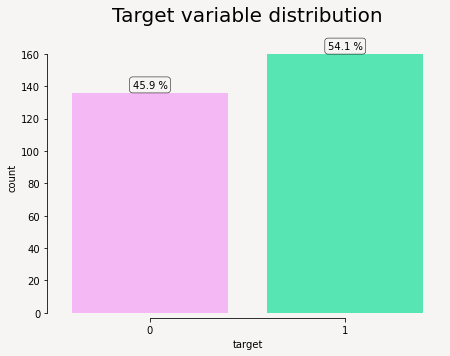

In [11]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

#### Numerical Features

**Statistical summary**

For the numerical features we can apply the handy pandas data.describe() method and get the global statistical summary. Key figures are highlighted below.

In [12]:
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


**Summary of the numerical features**

* Age:
  - The average age in the dataset is 54.5 years
  - The oldest is 77 years, whereas the youngest is 29 years old
* Cholesterol:
  - The average registered cholestrol level is 247.15
  - Maximum level is 564 and the minimum level is 126.
  - Note: According to several studies, a healthy cholesterol level is <200mg/dl and usually high level of cholesterol is associated with heart disease.
* Resting blood pressure:
  - 131 mean, 200 max and 94 min
* Max heart rate achieved:
  - The average max heart rate registered is 149.5 bpm. The Maximum and the minumum are 202 and 71bpm respectively.
* St_depression:
  - The average value of st_dpression is 1.06. Max is 6.2 and the minimum is 0.
* Number of major blood vessels:
  - A maximum of 3 and a minimum of 0 major blood vessels are observed. The mean value is 0.68.

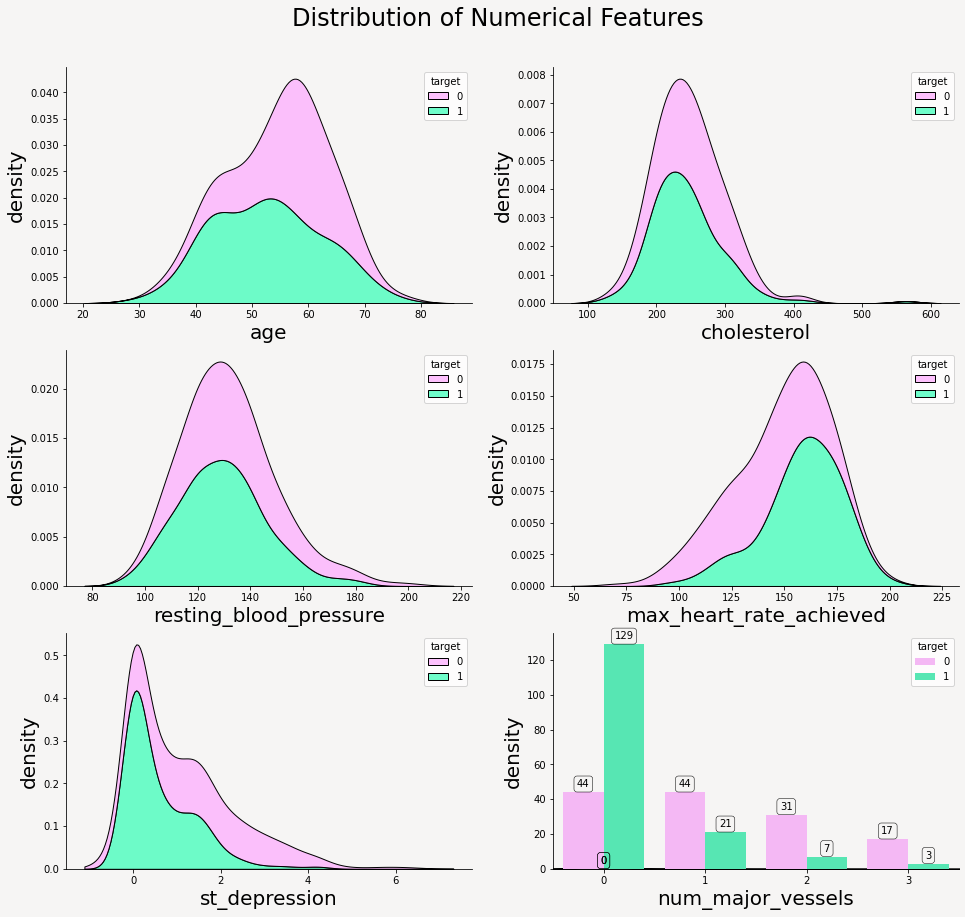

In [13]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
    
    ax = sns.kdeplot(data=data, x=col, hue="target", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    
    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24);

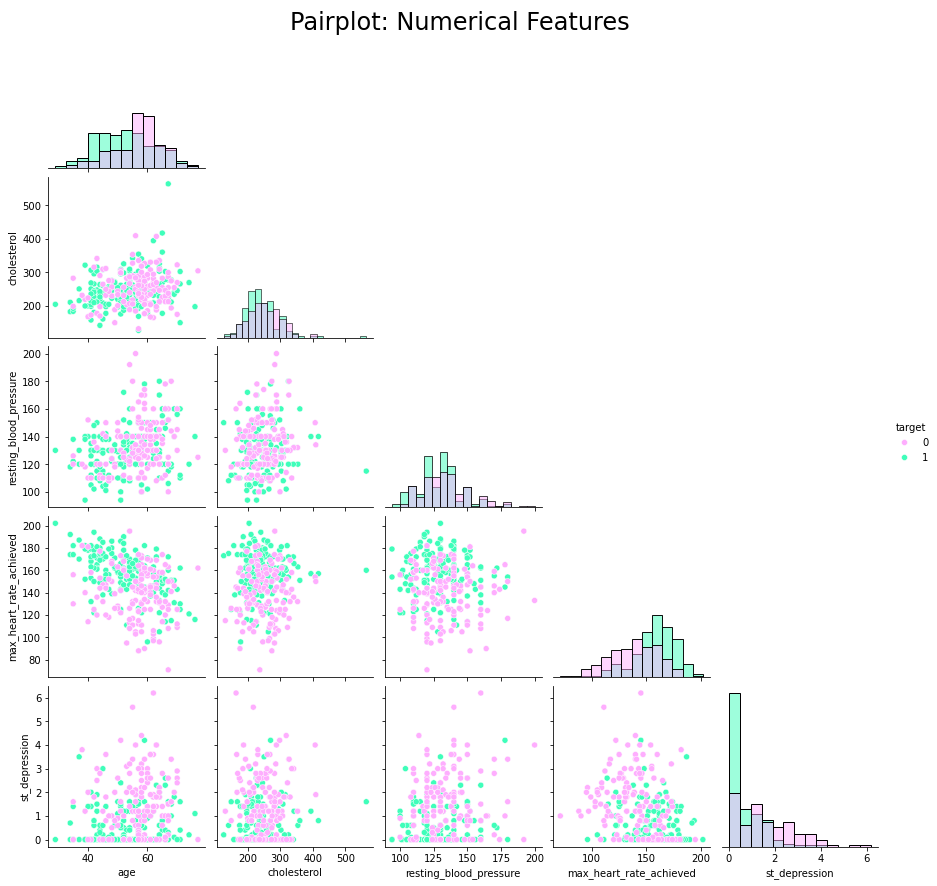

In [14]:
_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_ = data[_]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

Below are reg-plots of some selected features showing the linear relation with Age, similar to the first column in the pair-plot above. We observe that:

* Except `maximum_heart_rate_achieved`, the others are positively and linearly related with `age` (albeit a weaker relation with `st_depression`).
* Younger patients with higher `maximum_heart_rate_achieved` are more likely to have a heart condition.
* Lower `st_depression` regardless of age is also likely an indication of a heart disease.

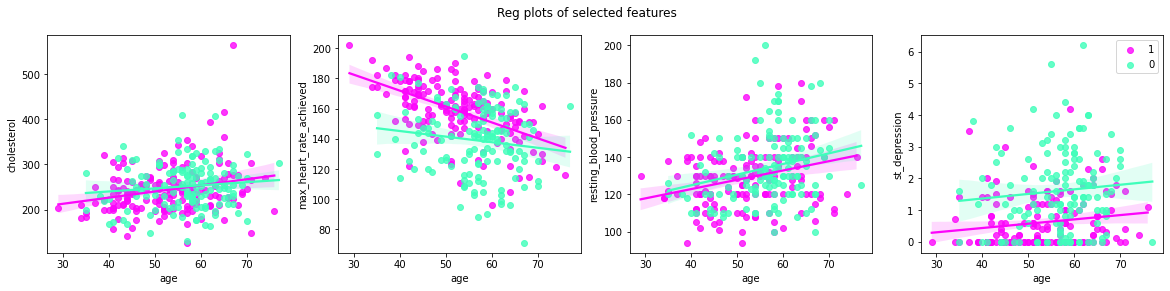

In [15]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=data[data['target'] ==1], x='age', y='cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

#### Categorical features

We use a count plot to visualize the different categories with respect to the target variable. Two things we could take note of are the distribution of each category in the dataset and their contribution to the probability of correct prediction of the target variable, i.e has disease (=1) or has no disease (=0). Below is the summary of the categorical features.


**Chest Pain**:
* More than 75% of the patients experience either typical angina or non-angina chest pain.
* Patients who experienced atypical angina or non-angina chest pain are more likely to have a heart disease.

**Resting Electrocardiogram**:
* Patients with Left ventricular hypertrophy are the fewest (~1.4%). The rest is almost a 50-50 split between patients with ST-T abnormality and those with normal REC tests.
* ST-T abnormality seem to have a better correlation with the target, i.e the majority of patients with this kind of REC test ended up with a heart disease.

**ST-Slope**:
* Most patients have a downsloping or flat ST-Slope of their REC test.
* downsloping ST-Slopes are a strong indication that a patient might have a heart disease.

**Thalassemia**:
* Most patients have a normal or reversable defect
* Patients who have thalassemia defects (reversable + fixed) are less likely to have a heart disease. Whereas, those with normal thalassemia are more likely to have a heart condition. Sounds not intuitive.

**Fasting blood sugar**
* Patients with lower (less than 120mg/ml) fasting blood sugar are the majority in our dataset consisting of ~85% of the sample.
* Having lower resting blood sugar tends to increase the chances (~54%) of a heart disease.

**Exercise Induced Angina**
* Two-third of the patients showed no exercise induced angina.
* 76% of the patients with exercise induced angina had no heart conditions. Whereas ~69% of the patients who did not experience exercise induced angina were diagnosed with heart condition.

**Sex**
* More patients in the sample data are male.
* Females seem to suffer from heart condition more than males.

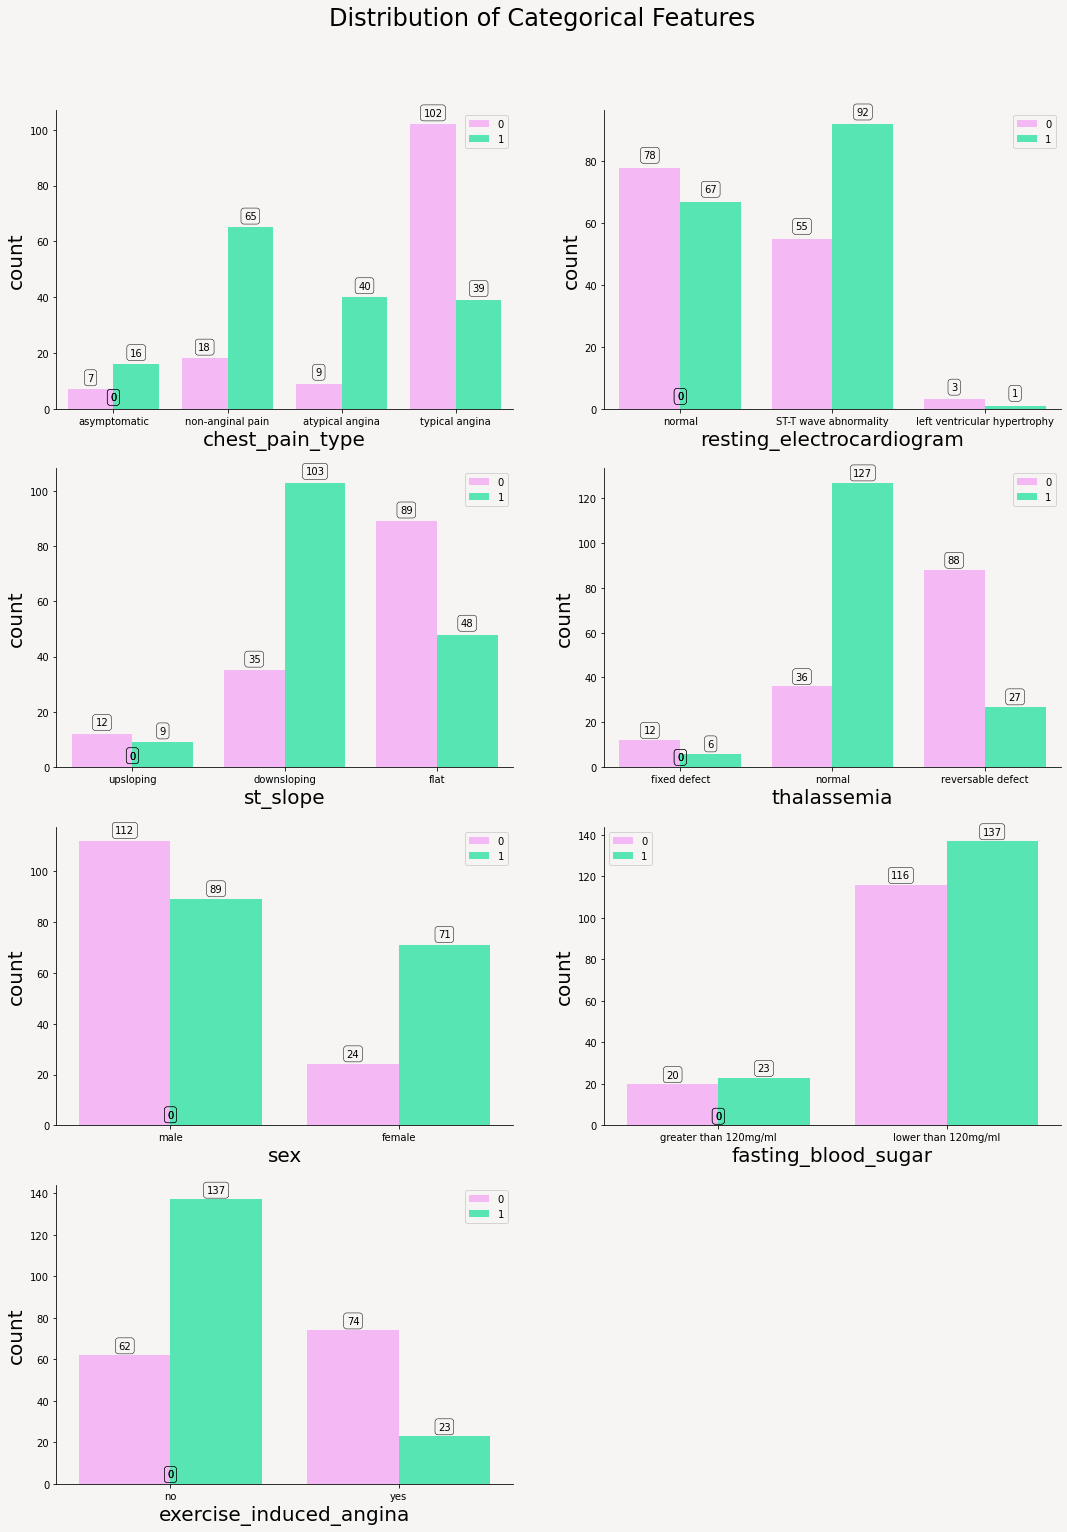

In [16]:
def count_plot(data, cat_feats):    
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(data, cat_feats[0:-1]);

### Correlations Heatmaps

Correlation heatmap is a useful tool to graphyically represent how two features are related to eachother. Depending upon the data types of the features, we need to use the appropriate correlation coefficient calculation methods.

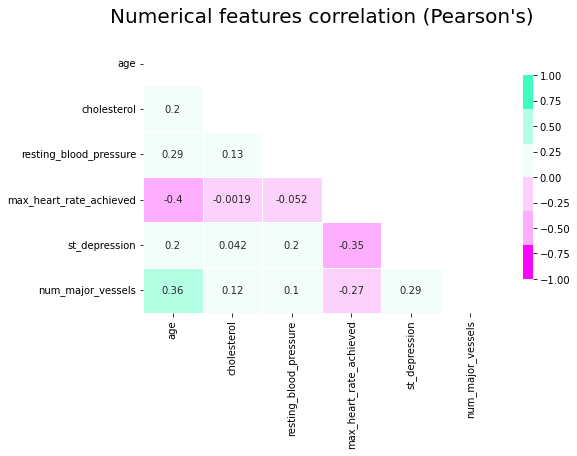

In [17]:
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);

### EDA Summary:
* Data size: 303 rows and 14 columns (13 independent + one target variable) > later reduced to 296 after removing faulty data points!
* Data has no missing values
* Features (columns) data type:
    * Six features are numerical
    * The rest (seven features) are categorical variables
* Target variable is fairly balanced, 54% no-disease to 46% has-disease
* Correlations:
    * Correlation between features is weak at best
    * From the numerical features num_major_vessels, max_heart_rate_achieved and st_depression are reasonabily fairly correlated with the target variable at -0.47, 0.43 and -0.43 correlation coefficient respectively.
    * From the categorical features chest_pain_type, num_major_vessels, thalassemia, and exercise_induced_angina are better correlated with the target variable, thalassemia being the highest at 0.52.
    * Cholestrol (to my surprize, but what do I know?) has less correlation with heart desease.
* Takeaway: features that have higher predictive power could be, chest_pain_type, num_major_vessels, thalassemia, exercise_induced_angina max_heart_rate_achieved and st_depression. We will see which features will appear as imporatnt by the classification models.

## Predictions

There are several metrics that can be used to gauge the performance of a given classification algorithm. The choice of the 'appropriate' metrics is then dependent on the type of problem we are dealing with. There are case where, for example, accuracy can be the right choice and in some other case a recall or precision could be more fitting to the purpose. Since we are dealing with medical case (classify if a case is positive for heart disease or not), we could use recall (true positive rate or sensitivity) as performance metrics to choose our classifier. Note here that we do not want to classify positive (has disease) cases as negative (no disease).

**Confusion matrix**: A confusion matrix (aka an error matrix) is a specific table layout that allows visualization of the performance of a supervised learning algorithm. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class. The table below is an example of a confusion matrix for a binary classification from which other terminologies/metric can be derived. Some of the metrics are described below.

<center><img src="img/confusion_matrix.png"/></center>



Term        |   Meaning  | Descriptions |
------------|------------| ------------- |
TP          | True Positive     | Positive cases which are predicted as positive |
FP          | False Positive    | Negative cases which are predicted as positive |
TN          | True Negative     | Negative cases which are predicted as negative |
FN          | False Negative    | Positive casea which are predicted as negative |


Accuracy : Measures how many of the cases are correctly identified/predicted by the model, i.e correct prediction divided by the total sample size.

$$

\frac{TP + TN}{TP + TN +FP +FN}
$$

Recall: Measures the rate of true positives, i.e how many of the actual positive cases are identified/predicted as positive by the model.

$$

\frac{TP}{TP + FN}
$$

Precision: Measures how many of the positive predicted cases are actually positive.

$$
\frac{TP}{TP + FP}

$$

F1-Score : Combines the precision and recall of the model and it is defined as the harmonic mean of the model’s precision and recall.

$$
2 \frac{recall*precision}{recall + precision}

$$

ROC curves : A receiver operating characteristic (ROC) curve, is a graphical plot which illustrates the performance of a binary classification algorithm as a function of true positive rate and false positive rate.

#### Classifiers

This is a binary classification problem (has-disease or no-disease cases). `Scikit learn` offers a wide range of classification algorithms and is often the starting point in most/traditional machine learning challenges, so we start by exploring few of the classification alorithms from the sklearn libarary such as Logistic Regression, Nearest Neighbors, Support Vectors, Nu SVC, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, Naive Bayes, Linear Discriminant Analysis, Quadratic Discriminant Analysis and Neural Net. Let's first build simple models using the above mentioned ML algorithms and later we will optimize them by tuning the parameters.

## Modeling options (Quick Summary)

* Logistic Regression: 
    * Finds decision boundary between classes
    * `sklearn.linear_model.LogisticRegression`
* Support Vector Classifier
    * Finds plane to separate classes
    * `sklearn.svm.SVC`
* Decision Tree
    * Finds simple 'rules' to classify data
    * `sklearn.tree.DecisionTreeClassifier`
* Random Forest
    * Combines multiple decision trees
    * `sklearn.ensemble.RandomForestClassifier`

## Training principles

* Model
    * Uses cleaned and feature-handled dataset
    * Learns patterns in training data
    Aims to predict target of heart disease diagnosis
* Principles
    * Model must generalize the unseen  data (outside of training set)
    * Hold-out some data to test model on after training completes
    * Split of training/testing is normally 70/30 or 80/20
    * We can use `sklearn.model_selection.train_test_split`

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder


In [19]:
def label_encode_cat_features(data, cat_features):
    '''
    Given a dataframe and its categorical features, this function returns label-encoded dataframe
    '''
    
    label_encoder = LabelEncoder()
    data_encoded = data.copy()
    
    for col in cat_features:
        data_encoded[col] = label_encoder.fit_transform(data[col])
    
    data = data_encoded
    
    return data


def score_summary(names, classifiers):
    '''
    Given a list of classiers, this function calculates the accuracy, 
    ROC_AUC and Recall and returns the values in a dataframe
    '''
    
    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)
    
    for name, clf in zip(names, classifiers):        
        clf.fit(X_train, y_train)
        
        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)        
        roc_auc = auc(fpr, tpr)
        
        # confusion matric, cm
        cm = confusion_matrix(y_val, pred) 
        
        # recall: TP/(TP+FN)
        recall = cm[1,1]/(cm[1,1] +cm[1,0])
        
        # precision: TP/(TP+FP)
        precision = cm[1,1]/(cm[1,1] +cm[0,1])
        
        # F1 score: TP/(TP+FP)
        f1 = 2*recall*precision/(recall + precision)

        df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = pd.concat([data_table, df], ignore_index=True)  

    return(np.round(data_table.reset_index(drop=True), 2))


def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    '''
    Plots confusion matrices in subplots.
    
    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and columns in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    
    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):
        
        # Fit the classifier and make predictions
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        
        # Compute confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        
        # Plot confusion matrix with seaborn heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
        
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')
        ax.set_title(names[i])
        
        i += 1       
        
    plt.tight_layout()
    plt.show()
    
    
def roc_auc_curve(names, classifiers):
    '''
    Given a list of classifiers, this function plots the ROC curves
    
    '''       
    plt.figure(figsize=(12, 8))   
        
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        
        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")

In [25]:
# split the data into train and test sets

cat_features = cat_feats
data = label_encode_cat_features(data, cat_features)

seed = 0
test_size = 0.25

features = data.columns[:-1]

X = data[features]
y = data['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)


# classifier algorithms with default parameters

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

In [26]:
score_summary(names, classifiers).sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
0,Logistic Regression,86.486486,0.916484,0.914286,0.820513,0.864865
9,Linear DA,85.135135,0.920147,0.885714,0.815789,0.849315
10,Quadratic DA,85.135135,0.897436,0.828571,0.852941,0.840580
5,Random Forest,83.783784,0.918315,0.828571,0.828571,0.828571
4,Decision Tree,82.432432,0.824542,0.828571,0.805556,0.816901
6,AdaBoost,82.432432,0.855678,0.914286,0.761905,0.831169
7,Gradient Boosting,82.432432,0.901099,0.885714,0.775000,0.826667
8,Naive Bayes,82.432432,0.915751,0.857143,0.789474,0.821918
3,Nu SVC,81.081081,0.913553,0.914286,0.744186,0.820513
11,Neural Net,78.378378,0.881319,0.942857,0.702128,0.804878


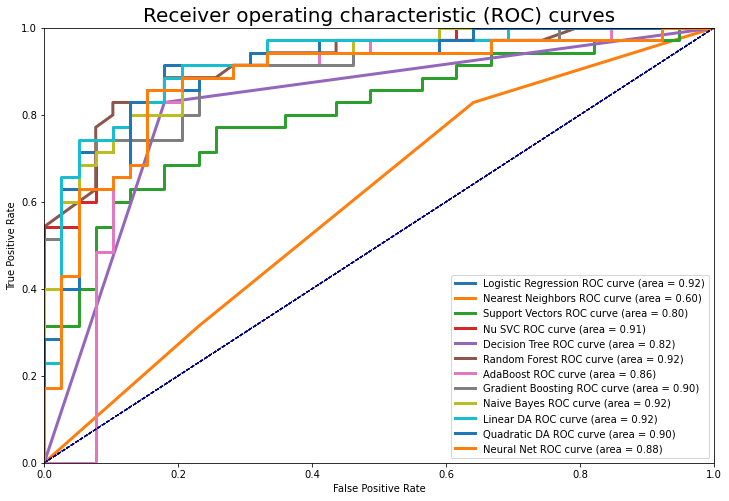

In [27]:
roc_auc_curve(names, classifiers)

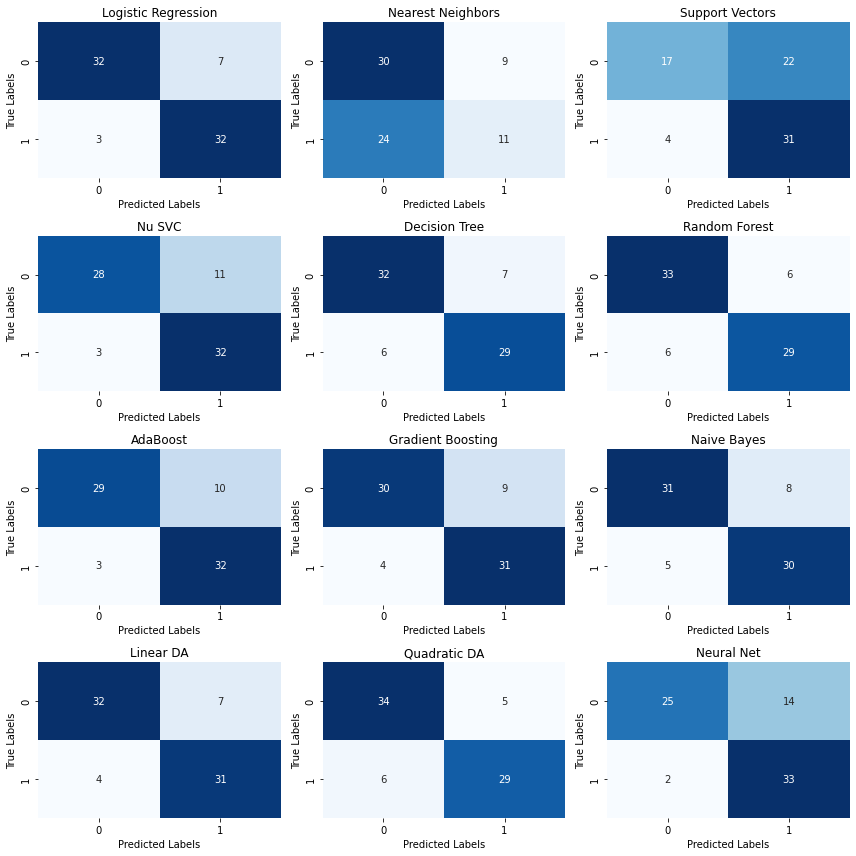

In [28]:
plot_conf_matrix(names, classifiers, nrows=4, ncols=3, fig_a=12, fig_b=12)

## Logging experiments on MLFlow

* Without MLflow
    * Manu untracked, disorganized experiment runs
    * Dissimilar, or incomparable runs
    * Unreproducible, lost run

* With MLflow
    * Tracked, organized experiments runs
    * Comparison between standardized runs
    * Reproducible runs
    * Share, deploy models

<center><img src="https://mlflow.org/img/hero.png"/></center>

### Creating experiments

`mlflow.set_experiment()`
* Sets experiment name
* Provides workspace for experiment runs

Usage:

In [1]:
import mlflow

ModuleNotFoundError: No module named 'mlflow'

In [1]:
import mlflow

# Set an experiment name, which is a workspace for your runs: mlflow.set_experiment("Heart Disease Classification")
mlflow.set_experiment("Heart Disease Classification")

ModuleNotFoundError: No module named 'mlflow'

In [2]:
# Start an MLflow run
with mlflow.start_run():
    lr = LogisticRegression(solver="liblinear", random_state=123)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    mlflow.log_param("solver", "liblinear")
    mlflow.log_metric("accuracy", accuracy)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic LR model for Heart Disease Classification")
    
    print(f"Accuracy: {accuracy}")

NameError: name 'mlflow' is not defined

### Retrieving experiments

`mlflow.search_runs()`

Returns DataFrame of metrics for multiple runs

In [ ]:
mlflow.search_runs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,params.solver,tags.mlflow.source.name,tags.Training Info,tags.mlflow.runName,tags.mlflow.source.type,tags.mlflow.user
0,e4ffee0e28544583a428dbaa47349e08,619483049297833105,FINISHED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:28:13.920000+00:00,2024-11-12 04:28:13.938000+00:00,0.864865,liblinear,/usr/local/python/3.12.6/lib/python3.12/site-p...,Basic LR model for Heart Disease Classification,secretive-deer-911,LOCAL,vscode
1,3ea93c4814534e37bbbeabf93b75841a,619483049297833105,FINISHED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:15:38.517000+00:00,2024-11-12 04:15:38.536000+00:00,0.864865,liblinear,/usr/local/python/3.12.6/lib/python3.12/site-p...,None,secretive-robin-63,LOCAL,vscode
2,de5b1a9375a74010a17d5c6fd8fb4e73,619483049297833105,FINISHED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:14:29.314000+00:00,2024-11-12 04:14:29.330000+00:00,0.864865,liblinear,/usr/local/python/3.12.6/lib/python3.12/site-p...,None,resilient-flea-272,LOCAL,vscode
3,1ee6806471034014a02e374f18b04de3,619483049297833105,FAILED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:10:24.628000+00:00,2024-11-12 04:10:24.649000+00:00,NaN,None,/usr/local/python/3.12.6/lib/python3.12/site-p...,None,sneaky-donkey-463,LOCAL,vscode
4,eb031e80c1254147b220f6442b5d11f4,619483049297833105,FAILED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:09:59.731000+00:00,2024-11-12 04:09:59.741000+00:00,NaN,None,/usr/local/python/3.12.6/lib/python3.12/site-p...,None,sincere-mink-65,LOCAL,vscode
5,4f5512b7f2294f9dabbb1f59eb087894,619483049297833105,FAILED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:09:42.817000+00:00,2024-11-12 04:09:42.824000+00:00,NaN,None,/usr/local/python/3.12.6/lib/python3.12/site-p...,None,delicate-croc-381,LOCAL,vscode


In [ ]:
# Search all runs in experiment
run_data = mlflow.get_run("e4ffee0e28544583a428dbaa47349e08")
exp_id = run_data.info.experiment_id
runs_df = mlflow.search_runs(exp_id)

In [ ]:
runs_df

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,params.solver,tags.mlflow.source.name,tags.Training Info,tags.mlflow.runName,tags.mlflow.source.type,tags.mlflow.user
0,e4ffee0e28544583a428dbaa47349e08,619483049297833105,FINISHED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:28:13.920000+00:00,2024-11-12 04:28:13.938000+00:00,0.864865,liblinear,/usr/local/python/3.12.6/lib/python3.12/site-p...,Basic LR model for Heart Disease Classification,secretive-deer-911,LOCAL,vscode
1,3ea93c4814534e37bbbeabf93b75841a,619483049297833105,FINISHED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:15:38.517000+00:00,2024-11-12 04:15:38.536000+00:00,0.864865,liblinear,/usr/local/python/3.12.6/lib/python3.12/site-p...,None,secretive-robin-63,LOCAL,vscode
2,de5b1a9375a74010a17d5c6fd8fb4e73,619483049297833105,FINISHED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:14:29.314000+00:00,2024-11-12 04:14:29.330000+00:00,0.864865,liblinear,/usr/local/python/3.12.6/lib/python3.12/site-p...,None,resilient-flea-272,LOCAL,vscode
3,1ee6806471034014a02e374f18b04de3,619483049297833105,FAILED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:10:24.628000+00:00,2024-11-12 04:10:24.649000+00:00,NaN,None,/usr/local/python/3.12.6/lib/python3.12/site-p...,None,sneaky-donkey-463,LOCAL,vscode
4,eb031e80c1254147b220f6442b5d11f4,619483049297833105,FAILED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:09:59.731000+00:00,2024-11-12 04:09:59.741000+00:00,NaN,None,/usr/local/python/3.12.6/lib/python3.12/site-p...,None,sincere-mink-65,LOCAL,vscode
5,4f5512b7f2294f9dabbb1f59eb087894,619483049297833105,FAILED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:09:42.817000+00:00,2024-11-12 04:09:42.824000+00:00,NaN,None,/usr/local/python/3.12.6/lib/python3.12/site-p...,None,delicate-croc-381,LOCAL,vscode


We are going to explore a little more about MLFlow during the next class!

## Parameter tuning (Randomized Search)

So chosen our best classifier, the Logistic regression model. However, this was achieved with default parameters. The intuition is that we could further improve our model with tuned parameters. Let's see if could achieve that using the scikit-learn RandomizedSearch algorithm.

What is a hyperparameter?
* Global model parameter (does not change during training)
* Adjust to improve model performance

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import mlflow

# Set an experiment name
mlflow.set_experiment("Heart Disease Classification")

# Start an MLflow run
with mlflow.start_run():
    lr = LogisticRegression(tol=1e-4, max_iter=1000, random_state=seed)
    
    space = dict(C=uniform(loc=0, scale=5),
                 penalty=['l2', 'l1'],
                 solver=['liblinear'])
    
    search = RandomizedSearchCV(lr, 
                                space, 
                                random_state=seed,
                                cv=5, 
                                scoring='f1')
    
    rand_search = search.fit(X_train, y_train)
    
    # Log the best hyperparameters
    mlflow.log_params(rand_search.best_params_)
    
    # Log the best score
    best_score = rand_search.best_score_
    mlflow.log_metric("best_f1_score", best_score)
    
    print('Best Hyperparameters: %s' % rand_search.best_params_)
    print('Best F1 Score: %s' % best_score)

Best Hyperparameters: {'C': np.float64(0.2835648865872159), 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 Score: 0.8690295195001078


In [ ]:
mlflow.search_runs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.best_f1_score,metrics.accuracy,params.penalty,params.C,params.solver,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.user,tags.Training Info
0,8eb805261e2541d4b6faee538d0b1a3a,619483049297833105,FINISHED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:48:28.923000+00:00,2024-11-12 04:48:29.264000+00:00,0.86903,NaN,l2,0.2835648865872159,liblinear,/usr/local/python/3.12.6/lib/python3.12/site-p...,LOCAL,judicious-lark-534,vscode,None
1,e4ffee0e28544583a428dbaa47349e08,619483049297833105,FINISHED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:28:13.920000+00:00,2024-11-12 04:28:13.938000+00:00,NaN,0.864865,None,None,liblinear,/usr/local/python/3.12.6/lib/python3.12/site-p...,LOCAL,secretive-deer-911,vscode,Basic LR model for Heart Disease Classification
2,3ea93c4814534e37bbbeabf93b75841a,619483049297833105,FINISHED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:15:38.517000+00:00,2024-11-12 04:15:38.536000+00:00,NaN,0.864865,None,None,liblinear,/usr/local/python/3.12.6/lib/python3.12/site-p...,LOCAL,secretive-robin-63,vscode,None
3,de5b1a9375a74010a17d5c6fd8fb4e73,619483049297833105,FINISHED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:14:29.314000+00:00,2024-11-12 04:14:29.330000+00:00,NaN,0.864865,None,None,liblinear,/usr/local/python/3.12.6/lib/python3.12/site-p...,LOCAL,resilient-flea-272,vscode,None
4,1ee6806471034014a02e374f18b04de3,619483049297833105,FAILED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:10:24.628000+00:00,2024-11-12 04:10:24.649000+00:00,NaN,NaN,None,None,None,/usr/local/python/3.12.6/lib/python3.12/site-p...,LOCAL,sneaky-donkey-463,vscode,None
5,eb031e80c1254147b220f6442b5d11f4,619483049297833105,FAILED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:09:59.731000+00:00,2024-11-12 04:09:59.741000+00:00,NaN,NaN,None,None,None,/usr/local/python/3.12.6/lib/python3.12/site-p...,LOCAL,sincere-mink-65,vscode,None
6,4f5512b7f2294f9dabbb1f59eb087894,619483049297833105,FAILED,file:///workspaces/econ725-fall2024/05-applied...,2024-11-12 04:09:42.817000+00:00,2024-11-12 04:09:42.824000+00:00,NaN,NaN,None,None,None,/usr/local/python/3.12.6/lib/python3.12/site-p...,LOCAL,delicate-croc-381,vscode,None


In [ ]:
params = rand_search.best_params_
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)
print(classification_report(y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.82      0.91      0.86        35

    accuracy                           0.86        74
   macro avg       0.87      0.87      0.86        74
weighted avg       0.87      0.86      0.86        74

